In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [ ]:
CHANNELS=3

train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Pine Apple/Pine Apple/Train',
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pine Apple/Pine Apple/Validation',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))
test_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Pine Apple/Pine Apple/Test',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
x,y=test_generator.next()
x.shape

(30, 224, 224, 3)

In [ ]:
VGG19 = tf.keras.applications.VGG19(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
VGG19.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
  VGG19,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=2, activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 46241346 (176.40 MB)
Trainable params: 262

In [ ]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
4/4 [==============================] - 127s 32s/step - loss: 4.5279 - accuracy: 0.9500 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
4/4 [==============================] - 120s 31s/step - loss: 2.8285 - accuracy: 0.9700 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
4/4 [==============================] - 104s 26s/step - loss: 2.6094 - accuracy: 0.9800 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_generator)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

1/1 [==============================] - 25s 25s/step - loss: 7.5499e-08 - accuracy: 1.0000
Accuracy: 1.0
Loss: 7.549913050297619e-08


In [ ]:
test_generator.class_indices

{'Bad': 0, 'Good': 1}

In [ ]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = ['Bad', 'Good']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

1/1 [==============================] - 24s 24s/step
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        15
        Good       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

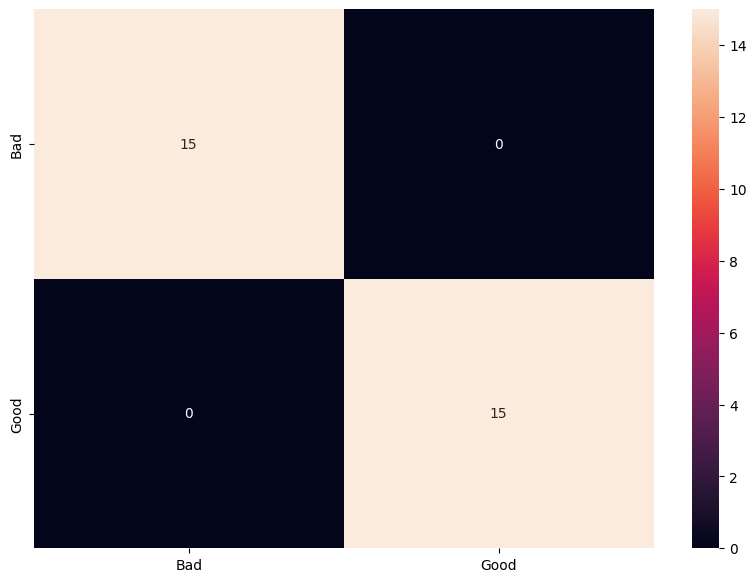

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['Bad', 'Good']],
                  columns = [i for i in ['Bad', 'Good',]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

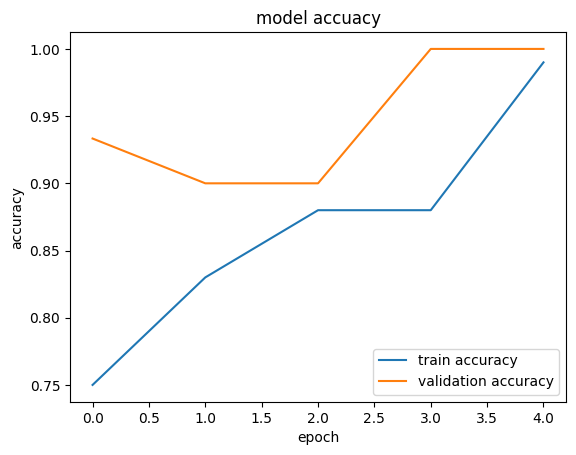

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()


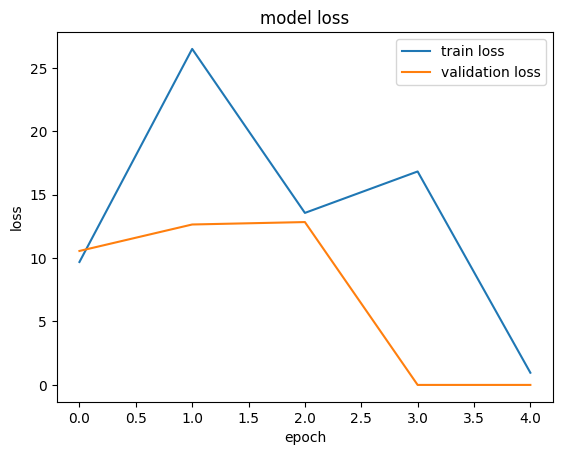

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()